<a href="https://colab.research.google.com/github/ekoabdulaziz96/deteksi_fraud_supervised/blob/master/PAYSIM_UnderSampling_PemodelanRF_FeatureImportance_pemodelan_klasik_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import collections
import time
from scipy import stats

In [2]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [0]:
np.random.seed(1)

In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

In [0]:
# confussion_matrik(y,pred)

In [0]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [0]:
# accuracy_metric(y,RF.predict(X))

In [0]:
def cross_val_split(X,fold=2,seed=0):
    np.random.seed(seed)
    n_folds= fold
    size = X.shape[0]/n_folds
    X_idx = list(range(X.shape[0]))
    folds_data= []
    for i in range(n_folds):
#         print(X_idx)
        random_idx = list(np.random.choice(X_idx,int(size),replace=False))
#         print(random_idx)
        X_idx = [idx for idx in X_idx if idx not in random_idx]
#         print(X_idx)

        folds_data.append(random_idx)
#         print("--")
    return folds_data

def kfold_cross_validation(model,X,y, n_fold=2, n_seed=0):
    folds = cross_val_split(X,fold=n_fold,seed=n_seed)
    fold_result =[]
    for i in range(len(folds)):
    #     print(i)
        train = []
        for j in range(len(folds)):
            if j != i:
                train = train + folds[j]
        test = folds[i]

        X_train = X.iloc[train,:].reset_index(drop=True)
        y_train = y[train].reset_index(drop=True)

        X_test = X.iloc[test,:].reset_index(drop=True)
        y_test = y[test].reset_index(drop=True)


        t0 = time.time()
        model.fit(X_train, y_train)
        t1 = time.time()
        waktu = t1 - t0

        predict = model.predict(X_test)
        accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

        result = [accuracy,sensitivity,specifity,precision,recall,f1_score,waktu]
        fold_result.append(result)
        
    return fold_result

In [0]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    


## ---------

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
link = 'https://drive.google.com/open?id=1FucClAGJRQ4fiTn13xAD7cqkgTphuLsg' # The shareable link

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1FucClAGJRQ4fiTn13xAD7cqkgTphuLsg


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('creditcard_ulb.csv')  
read_df = pd.read_csv('creditcard_ulb.csv')
# Dataset is now stored in a Pandas Dataframe
# df.info()

In [0]:
df = read_df.copy()
df['Class'] = read_df['isFraud']
df = df.drop(['isFraud'], axis=1)

In [15]:
df.shape

(6362620, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud    int64
Class             int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [17]:
df['Class'].value_counts()

0    6354407
1       8213
Name: Class, dtype: int64

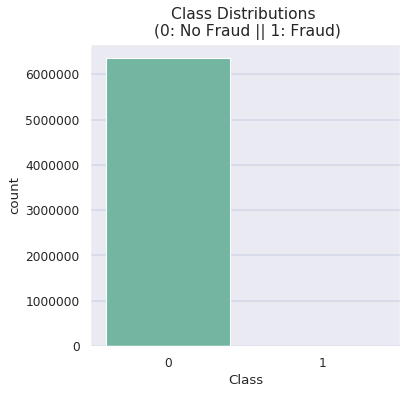

In [18]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df,palette='Set2')


In [19]:
count = 0
for a in df.columns:
    if df[a].isnull().sum() > 0 :
        print(a)
        count+=1
count

0

In [20]:
len(df.columns)

11

In [21]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,Class
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [0]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig',
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

In [23]:
df.isnull().values.any()

False

----------------------------------

2.1. Which types of transactions are fraudulent?
We find that of the five types of transactions, fraud occurs only in two of them (see also kernels by Net, Philipp Schmidt and Ibe_Noriaki): 'TRANSFER' where money is sent to a customer / fraudster and 'CASH_OUT' where money is sent to a merchant who pays the customer / fraudster in cash. Remarkably, the number of fraudulent TRANSFERs almost equals the number of fraudulent CASH_OUTs (see the right half of the plot in section 5.1). These observations appear, at first, to bear out the description provided on Kaggle for the modus operandi of fraudulent transactions in this dataset, namely, fraud is committed by first transferring out funds to another account which subsequently cashes it out. We will return to this issue later in section 2.4

In [24]:
print('\n The types of fraudulent transactions are {}'.format(\
list(df.loc[df.Class == 1].type.drop_duplicates().values))) # only 'CASH_OUT' 
                                                             # & 'TRANSFER'

dfFraudTransfer = df.loc[(df.Class == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.Class == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer))) # 4097

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout))) # 4116


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


In [25]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [26]:
df['Class'].value_counts()

0    6354407
1       8213
Name: Class, dtype: int64

2.2. What determines whether the feature isFlaggedFraud gets set or not?
It turns out that the origin of isFlaggedFraud is unclear, contrasting with the description provided. The 16 entries (out of 6 million) where the isFlaggedFraud feature is set do not seem to correlate with any explanatory variable. The data is described as isFlaggedFraud being set when an attempt is made to 'TRANSFER' an 'amount' greater than 200,000. In fact, as shown below, isFlaggedFraud can remain not set despite this condition being met.

In [27]:
print('\nThe type of transactions in which isFlaggedFraud is set: \
{}'.format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates()))) 
                                                            # only 'TRANSFER'

dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\nMin amount transacted when isFlaggedFraud is set= {}'\
                                  .format(dfFlagged.amount.min())) # 353874.22

print('\nMax amount transacted in a TRANSFER where isFlaggedFraud is not set=\
 {}'.format(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max())) # 92445516.64


The type of transactions in which isFlaggedFraud is set: ['TRANSFER']

Min amount transacted when isFlaggedFraud is set= 353874.22

Max amount transacted in a TRANSFER where isFlaggedFraud is not set= 92445516.64


Can oldBalanceDest and newBalanceDest determine isFlaggedFraud being set? The old is identical to the new balance in the origin and destination accounts, for every TRANSFER where isFlaggedFraud is set. This is presumably because the transaction is halted [4]. Interestingly, oldBalanceDest = 0 in every such transaction. However, as shown below, since isFlaggedFraud can remain not set in TRANSFERS where oldBalanceDest and newBalanceDest can both be 0, these conditions do not determine the state of isFlaggedFraud.

In [28]:
print('\nThe number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and\
 newBalanceDest = 0: {}'.\
format(len(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & \
(dfTransfer.oldBalanceDest == 0) & (dfTransfer.newBalanceDest == 0)]))) # 4158


The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0: 4158


isFlaggedFraud being set cannot be thresholded on oldBalanceOrig since the corresponding range of values overlaps with that for TRANSFERs where isFlaggedFraud is not set (see below). Note that we do not need to consider newBalanceOrig since it is updated only after the transaction, whereas isFlaggedFraud would be set before the transaction takes place.

In [29]:
print('\nMin, Max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs: {}'.\
format([round(dfFlagged.oldBalanceOrig.min()), round(dfFlagged.oldBalanceOrig.max())]))

print('\nMin, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where \
oldBalanceOrig = \
newBalanceOrig: {}'.format(\
[dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldBalanceOrig \
== dfTransfer.newBalanceOrig)].oldBalanceOrig.min(), \
round(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldBalanceOrig \
               == dfTransfer.newBalanceOrig)].oldBalanceOrig.max())]))


Min, Max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs: [353874.0, 19585040.0]

Min, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrig = newBalanceOrig: [0.0, 575668.0]


Can isFlaggedFraud be set based on seeing a customer transacting more than once? Note that duplicate customer names don't exist within transactions where isFlaggedFraud is set, but duplicate customer names exist within transactions where isFlaggedFraud is not set. It turns out that originators of transactions that have isFlaggedFraud set have transacted only once. Very few destination accounts of transactions that have isFlaggedFraud set have transacted more than once.

In [30]:
print('\nHave originators of transactions flagged as fraud transacted more than \
once? {}'\
.format((dfFlagged.nameOrig.isin(pd.concat([dfNotFlagged.nameOrig, \
                                    dfNotFlagged.nameDest]))).any())) # False

print('\nHave destinations for transactions flagged as fraud initiated\
 other transactions? \
{}'.format((dfFlagged.nameDest.isin(dfNotFlagged.nameOrig)).any())) # False

# Since only 2 destination accounts of 16 that have 'isFlaggedFraud' set have been
# destination accounts more than once,
# clearly 'isFlaggedFraud' being set is independent of whether a 
# destination account has been used before or not

print('\nHow many destination accounts of transactions flagged as fraud have been \
destination accounts more than once?: {}'\
.format(sum(dfFlagged.nameDest.isin(dfNotFlagged.nameDest)))) # 2


Have originators of transactions flagged as fraud transacted more than once? False

Have destinations for transactions flagged as fraud initiated other transactions? False

How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: 2


### Conclusion: Although isFraud is always set when isFlaggedFraud is set, since isFlaggedFraud is set just 16 times in a seemingly meaningless way, we can treat this feature as insignificant and discard it in the dataset without loosing information.

In [31]:
df.describe()


,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFlaggedFraud,Class
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,2.514687e-06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,1.585775e-03,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


From the exploratory data analysis (EDA) of section 2, we know that fraud only occurs in 'TRANSFER's and 'CASH_OUT's. So we assemble only the corresponding data in X for analysis

In [0]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

randomState = 5
np.random.seed(randomState)

#X = X.loc[np.random.choice(X.index, 100000, replace = False)]

Y = X['Class']
del X['Class']

# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) # convert dtype('O') to dtype(int)

The data has several transactions with zero balances in the destination account both before and after a non-zero amount is transacted. The fraction of such transactions, where zero likely denotes a missing value, is much larger in fraudulent (50%) compared to genuine transactions (0.06%).

In [33]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldBalanceDest == 0) & \
(Xfraud.newBalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldBalanceDest == 0) & \
(XnonFraud.newBalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345


Since the destination account balances being zero is a strong indicator of fraud, we do not impute the account balance (before the transaction is made) with a statistic or from a distribution with a subsequent adjustment for the amount transacted. Doing so would mask this indicator of fraud and make fraudulent transactions appear genuine. Instead, below we replace the value of 0 with -1 which will be more useful to a suitable machine-learning (ML) algorithm detecting fraud.

In [0]:
X.loc[(X.oldBalanceDest == 0) & (X.newBalanceDest == 0) & (X.amount != 0), \
      ['oldBalanceDest', 'newBalanceDest']] = - 1

In [0]:
X.loc[(X.oldBalanceOrig == 0) & (X.newBalanceOrig == 0) & (X.amount != 0), \
      ['oldBalanceOrig', 'newBalanceOrig']] = np.nan

In [0]:
X['errorBalanceOrig'] = X.newBalanceOrig + X.amount - X.oldBalanceOrig
X['errorBalanceDest'] = X.oldBalanceDest + X.amount - X.newBalanceDest

In [0]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

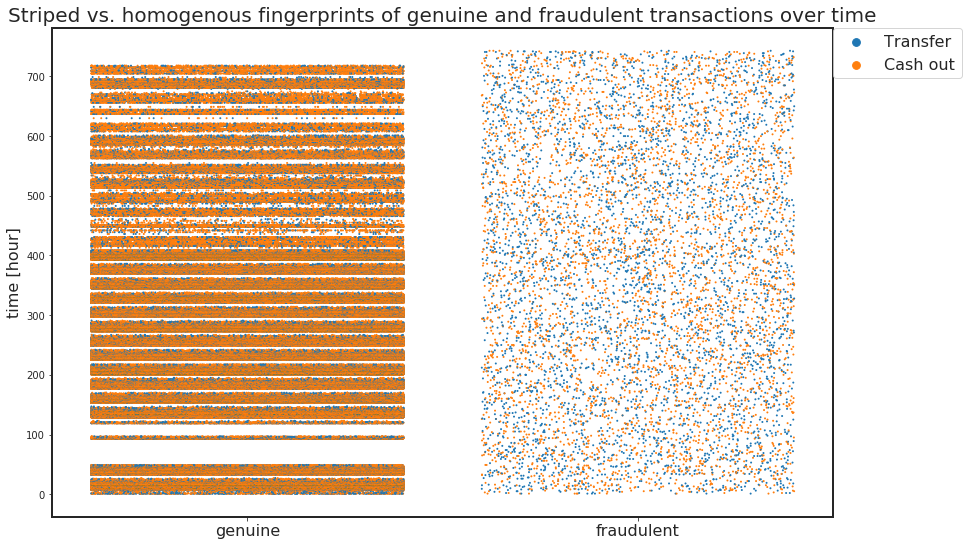

In [126]:
ax = plotStrip(Y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent \
transactions over time', size = 20);

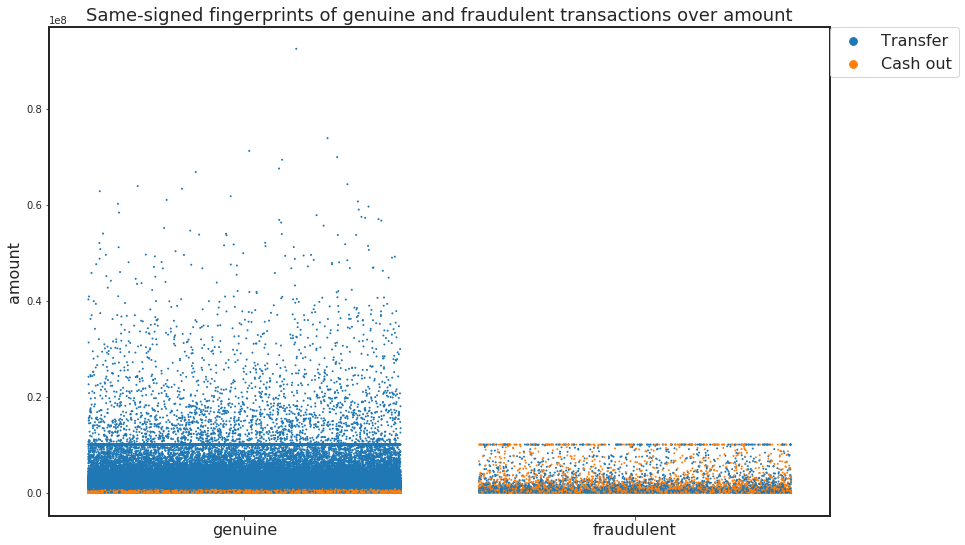

In [127]:
limit = len(X)
ax = plotStrip(Y[:limit], X.amount[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('Same-signed fingerprints of genuine \
and fraudulent transactions over amount', size = 18);

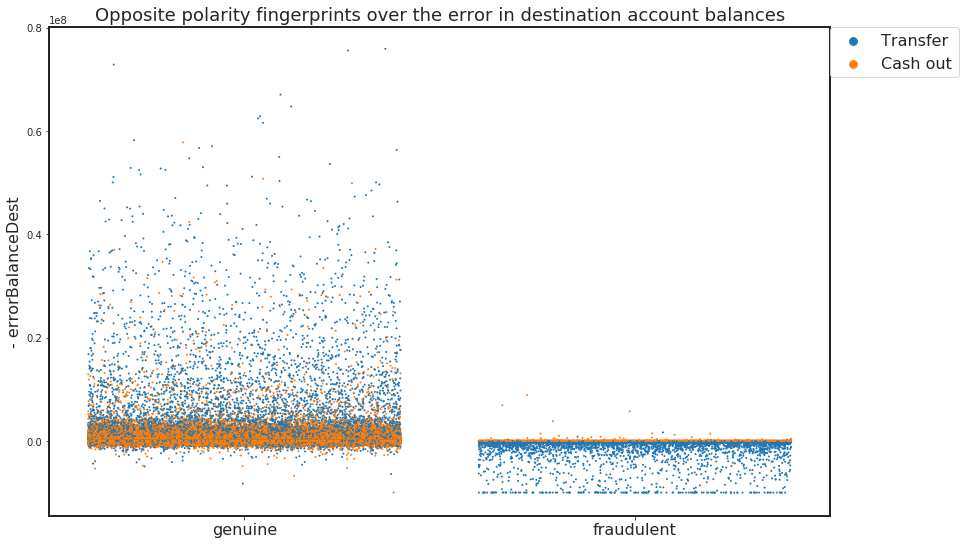

In [128]:
limit = len(X)
ax = plotStrip(Y[:limit], - X.errorBalanceDest[:limit], X.type[:limit], \
              figsize = (14, 9))
ax.set_ylabel('- errorBalanceDest', size = 16)
ax.set_title('Opposite polarity fingerprints over the error in \
destination account balances', size = 18);

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


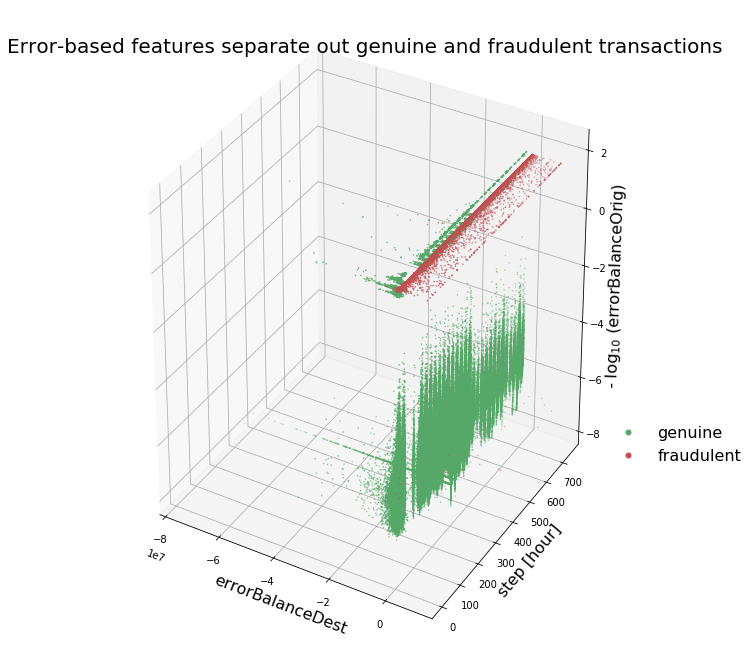

In [129]:
# Long computation in this cell (~2.5 minutes)
from mpl_toolkits.mplot3d import axes3d, Axes3D 
x = 'errorBalanceDest'
y = 'step'
z = 'errorBalanceOrig'
zOffset = 0.02
limit = len(X)

sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.loc[Y == 0, x][:limit], X.loc[Y == 0, y][:limit], \
  -np.log10(X.loc[Y == 0, z][:limit] + zOffset), c = 'g', marker = '.', \
  s = 1, label = 'genuine')
    
ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], \
  -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', \
  s = 1, label = 'fraudulent')

ax.set_xlabel(x, size = 16); 
ax.set_ylabel(y + ' [hour]', size = 16); 
ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
ax.set_title('Error-based features separate out genuine and fraudulent \
transactions', size = 20)

plt.axis('tight')
ax.grid(1)

noFraudMarker = mlines.Line2D([], [], linewidth = 0, color='g', marker='.',
                          markersize = 10, label='genuine')
fraudMarker = mlines.Line2D([], [], linewidth = 0, color='r', marker='.',
                          markersize = 10, label='fraudulent')

plt.legend(handles = [noFraudMarker, fraudMarker], \
           bbox_to_anchor = (1.20, 0.38 ), frameon = False, prop={'size': 16});

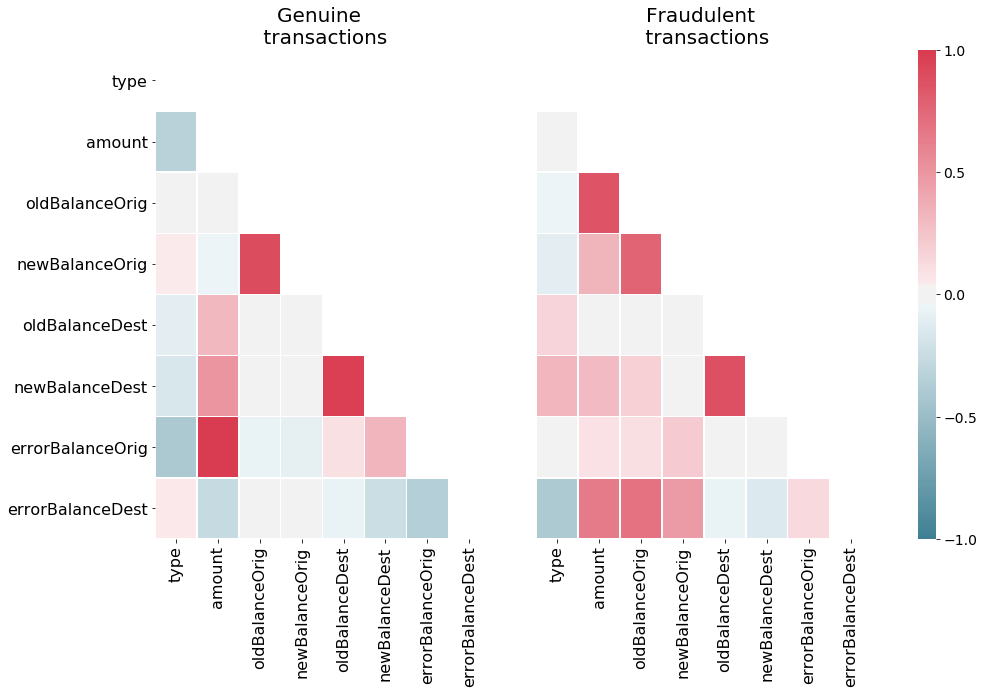

In [130]:
Xfraud = X.loc[Y == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = X.loc[Y == 0]
                  
correlationNonFraud = XnonFraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Genuine \n transactions', size = 20)

correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraudulent \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

In [131]:
print('skew = {}'.format( len(Xfraud) / float(len(X)) ))

skew = 0.002964544224336551


In [0]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, \
                                                random_state = randomState)

In [133]:
# Long computation in this cell (~1.8 minutes)
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY, \
                                              probabilities[:, 1])))

AUPRC = 0.9986361116985444


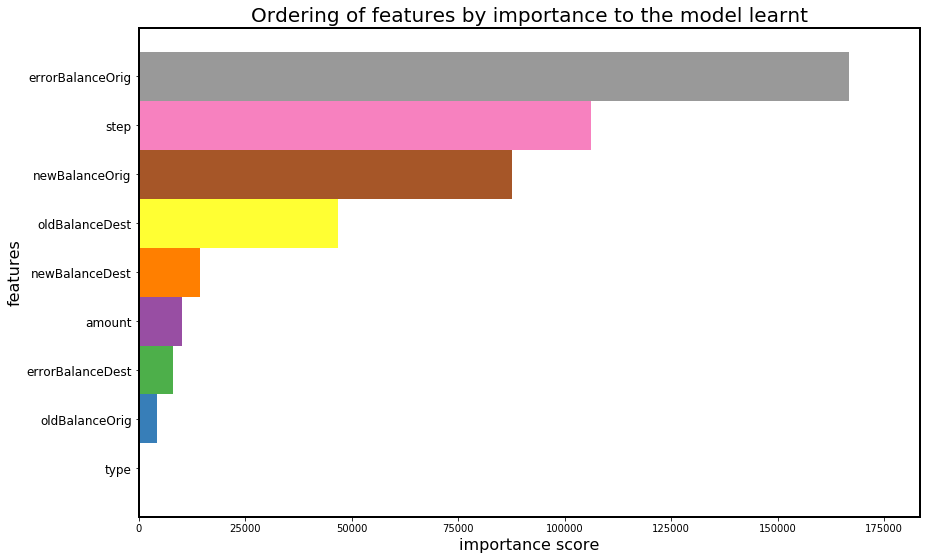

In [134]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

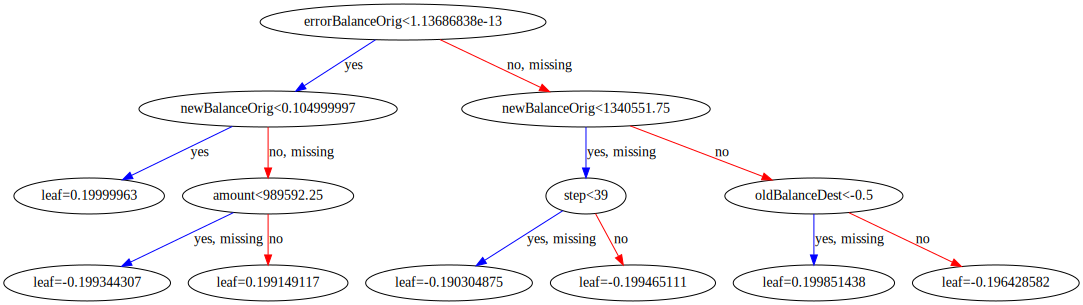

In [135]:
to_graphviz(clf)

In [0]:
# # Long computation in this cell (~6 minutes)

# trainSizes, trainScores, crossValScores = learning_curve(\
# XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4), trainX,\
#                                          trainY, scoring = 'average_precision')

In [0]:
# trainScoresMean = np.mean(trainScores, axis=1)
# trainScoresStd = np.std(trainScores, axis=1)
# crossValScoresMean = np.mean(crossValScores, axis=1)
# crossValScoresStd = np.std(crossValScores, axis=1)

# colours = plt.cm.tab10(np.linspace(0, 1, 9))

# fig = plt.figure(figsize = (14, 9))
# plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
#     trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
# plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
#     crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
# plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
#          color = colours[0])
# plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
#          color = colours[1])

# ax = plt.gca()
# for axis in ['top','bottom','left','right']:
#     ax.spines[axis].set_linewidth(2)

# handles, labels = ax.get_legend_handles_labels()
# plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
#                loc=2, borderaxespad=0, fontsize = 16);
# plt.xlabel('training set size', size = 16); 
# plt.ylabel('AUPRC', size = 16)
# plt.title('Learning curves indicate slightly underfit model', size = 20);


In [38]:
df = df.reset_index(drop=True)
df.tail()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,Class
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,0,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,0,1


In [39]:
df['Class'].value_counts()

0    6354407
1       8213
Name: Class, dtype: int64

In [40]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFlaggedFraud', 'Class'],
      dtype='object')

In [0]:
df_ = df.copy()

In [0]:
# df['type'].unique()

In [0]:
a = {}
i = 1
for m in df_['type'].unique():
  if m not in a :
    a[m] = i
    i +=1
    
df_['type'] = df_['type'].map(a)
# a

In [0]:
a = {}
i = 1
for m in df_['nameOrig'].unique():
  if m not in a :
    a[m] = i
    i +=1
    
df_['nameOrig'] = df_['nameOrig'].map(a)

In [0]:
a = {}
i = 1
for m in df_['nameDest'].unique():
  if m not in a :
    a[m] = i
    i +=1
    
df_['nameDest'] = df_['nameDest'].map(a)

In [48]:
df_.tail()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,Class
6362615,743,3,339682.13,6353303,339682.13,0.0,1586561,0.00,339682.13,0,1
6362616,743,2,6311409.28,6353304,6311409.28,0.0,2722361,0.00,0.00,0,1
6362617,743,3,6311409.28,6353305,6311409.28,0.0,1077995,68488.84,6379898.11,0,1
6362618,743,2,850002.52,6353306,850002.52,0.0,2722362,0.00,0.00,0,1
6362619,743,3,850002.52,6353307,850002.52,0.0,269442,6510099.11,7360101.63,0,1


In [0]:
# # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# # df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# # df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df['scaled_amount'] = minmax_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = minmax_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df.drop(['Time','Amount'], axis=1, inplace=True)

# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

# # Amount and Time are Scaled!

# df.head()

In [56]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df_copy = df_.copy()
# df_copy = df_copy.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df_copy.loc[df_copy['Class'] == 1]
# non_fraud_df = df_copy.loc[df['Class'] == 0][:8213]
non_fraud_df = df_copy.loc[df_copy['Class'] == 0].sample(n=8213,random_state=1)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=1)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,Class
0,118,3,167963.64,1059445,167963.64,0.00,100611,0.00,167963.64,0,1
1,714,3,390763.24,6349309,390763.24,0.00,687641,1422500.77,1813264.01,0,1
2,40,5,144403.82,821719,14948244.86,15092648.68,350126,190175.64,46693.00,0,0
3,281,2,556720.82,3816556,556720.82,0.00,1629495,0.00,0.00,0,1
4,267,3,1654055.02,3607824,1654055.02,0.00,196141,2165407.21,3819462.24,0,1


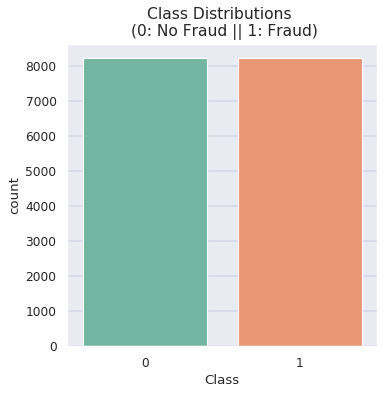

In [57]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df_new,palette='Set2')

In [0]:
# X = df.drop('Class', axis=1)
# y = df['Class'].copy()

In [0]:
X_new = df_new.drop('Class', axis=1)
y_new = df_new['Class'].copy()

In [0]:
# y_new.value_counts()

In [62]:
X_new.tail(30)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud
16396,36,3,145350.42,675650,29534.00,0.00,150563,1004856.09,1150206.51,0
16397,128,2,3062506.58,1069909,3062506.58,0.00,462542,0.00,0.00,0
16398,253,1,31007.67,3348970,50309.00,19301.33,1427584,0.00,0.00,0
16399,385,5,38848.12,5555804,5510605.05,5549453.18,2114682,312166.01,273317.89,0
16400,164,3,281409.38,1854949,0.00,0.00,22664,7755795.56,8037204.95,0
16401,365,3,4841332.26,5181741,4841332.26,0.00,390174,12806.80,4854139.07,0
16402,38,3,448004.86,739175,448004.86,0.00,317335,147828.66,595833.52,0
16403,614,2,309061.50,6256073,309061.50,0.00,2679155,0.00,0.00,0
16404,228,2,10000000.00,2895559,10497526.17,497526.17,1234618,0.00,0.00,0
16405,401,3,136162.78,5783423,8059.00,0.00,149337,5135474.44,5271637.22,0


In [0]:
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# X_neww = minmax_scaler.fit_transform(X_new)
# X_new = pd.DataFrame(X_neww, columns=X_new.columns)
# X_new.tail()

# # SKLearn


In [64]:
from sklearn.ensemble import RandomForestClassifier
n_tree = 10
clf = RandomForestClassifier(random_state=1,n_estimators=n_tree, max_features='sqrt')
clf.fit(X_new,y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [65]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=1)
clf_DT.fit(X_new,y_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
def run_skenarion_1 (clf,X,y,kfolds):
    CV_SKLearn = kfold_cross_validation(clf,X,y,n_fold=kfolds,n_seed=1)
    df_result = pd.DataFrame(data= CV_SKLearn, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

    df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [67]:
result_SKLearn = run_skenarion_1(clf,X_new,y_new,5)
result_SKLearn

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
1,0.989954,0.993998,0.985794,0.986301,0.993998,0.990135,0.149365
2,0.989954,0.992220,0.987608,0.988081,0.992220,0.990146,0.156699
3,0.990259,0.993699,0.987044,0.986241,0.993699,0.989956,0.158071
4,0.989954,0.992611,0.987357,0.987140,0.992611,0.989868,0.157315
5,0.989346,0.992793,0.985802,0.986277,0.992793,0.989524,0.150100
mean,0.989893,0.993064,0.986721,0.986808,0.993064,0.989926,0.154310


In [68]:
result_SKLearn = run_skenarion_1(clf_DT,X_new,y_new,5)
result_SKLearn

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
1,0.989954,0.992797,0.987029,0.987463,0.992797,0.990123,0.065766
2,0.988432,0.987433,0.989467,0.989802,0.987433,0.988616,0.070896
3,0.990563,0.993699,0.987633,0.986859,0.993699,0.990267,0.063695
4,0.989346,0.990148,0.988561,0.988322,0.990148,0.989234,0.065168
5,0.986910,0.994595,0.979012,0.979882,0.994595,0.987183,0.071018
mean,0.989041,0.991734,0.986340,0.986465,0.991734,0.989085,0.067309


In [0]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clf_LR = LogisticRegression()
clf_KNN = KNeighborsClassifier()
clf_SVM = SVC()
clf_NB = GaussianNB()
clf_DT_ = DecisionTreeClassifier(random_state=1)
clf_RF = RandomForestClassifier(random_state=1,n_estimators=10)
##skenario 
skenario_1 = {}
skenario_1['1'] = clf_LR
skenario_1['2'] = clf_KNN
skenario_1['3'] = clf_SVM
skenario_1['4'] = clf_NB
skenario_1['5'] = clf_DT_
skenario_1['6'] = clf_RF

In [71]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [75]:
result = {}
for i in skenario_1:
#     print('komposisi', skenario_1[i])
  
    clf_skenario = skenario_1[i]

#     result_SKLearn = run_skenarion_1(clf_skenario,X_new,y_new,5)
#     print(result_SKLearn)

    result[i] = run_skenarion_1(clf_skenario,X_new,y_new,5)
    
#     nama_file = 'komposisi999.csv'
#     nama_file = nama_file.replace('999',str(i))

#     result_SKLearn.to_csv(nama_file, sep=';',index=False)
#     !cp komposisi1.csv drive/My\ Drive/
                


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [77]:
df_result = pd.DataFrame()
for i in skenario_1:
    df_result = df_result.append(result[i].iloc[5:,:])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name

df_result

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
0,0.906971,0.892627,0.921382,0.918988,0.892627,0.905567,0.097853
1,0.906971,0.892791,0.921351,0.919033,0.892791,0.905662,0.016379
2,0.491446,0.400960,0.600000,0.795495,0.400960,0.264541,12.241709
3,0.738630,0.610706,0.866471,0.824436,0.610706,0.699946,0.004180
4,0.989041,0.991734,0.986340,0.986465,0.991734,0.989085,0.065864
5,0.989893,0.993064,0.986721,0.986808,0.993064,0.989926,0.148601


In [0]:
# df_result = pd.DataFrame()
# for i in skenario_1:
#     nama_file = 'hasil/skenario2/random/komposisi999.csv'
#     nama_file = nama_file.replace('999',str(i))
#     df_komposisi = pd.read_csv(nama_file,sep=";")
#     df_result = df_result.append(df_komposisi.iloc[5:,:])
    
# df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
# df_result = df_result.set_index('No')

# del df_result.index.name

# df_result.to_csv('hasil/skenario2/random/result.csv', sep=';',index=False)
# df_result

	Akurasi	Sensitivity	Specifity	precision	recall	f1_score	Waktu
0	0.643515	0.611269	0.676482	0.653908	0.611269	0.631376	0.106961
1	0.674895	0.695789	0.656056	0.669505	0.695789	0.681399	0.040600
2	0.728870	0.462980	0.995012	0.989117	0.462980	0.630579	0.621244
3	0.535146	0.087875	0.982379	0.836302	0.087875	0.158357	0.011197
4	0.709205	0.756564	0.663177	0.691868	0.756564	0.722106	0.017727
5	0.744770	0.712655	0.778104	0.762695	0.712655	0.736166	0.044600

In [0]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
fitur_importance =[]
for f in range(X_new.shape[1]):
    if  importances[indices[f]] > 0 :
        fitur_importance.append([X_new.columns[indices[f]],importances[indices[f]]])
        print("%2d) %-*s %f" % (f + 1, 30,
        X_new.columns[indices[f]],
        importances[indices[f]]))

 1) field3                         0.188356
 2) zip1                           0.163208
 3) frek                           0.130702
 4) field4                         0.106586
 5) hour1                          0.106035
 6) amount                         0.072716
 7) flag2                          0.046721
 8) field1                         0.038550
 9) flag5                          0.034140
10) flag1                          0.031791
11) flag3                          0.026947
12) field2                         0.024516
13) indicator1                     0.016464
14) indicator2                     0.009658
15) flag4                          0.003610


In [0]:
df_FI = pd.DataFrame(data=fitur_importance,columns=['fitur','value'])
# np.array(df_FI['fitur'])
df_FI

,fitur,value
0,field3,0.188356
1,zip1,0.163208
2,frek,0.130702
3,field4,0.106586
4,hour1,0.106035
5,amount,0.072716
6,flag2,0.046721
7,field1,0.038550
8,flag5,0.034140
9,flag1,0.031791


In [0]:
# dot_data = StringIO()  
# tree.export_graphviz(clf.estimators_[8], out_file=dot_data,  
#                          feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [0]:
# dot_data = StringIO()  
# tree.export_graphviz(clf_DT,out_file=dot_data,feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())